# Exploratory data analysis

EDA of the experiments listed in the EnviroTox database (excluding inorganic compounds).

## EnviroTox database

Health and Environmental Sciences Institute (HESI). 2022. EnviroTox Database & Tools. Version 2.0.0 Available: http://www.envirotoxdatabase.org/ (data retrieval: 14/04/2022)


Table of contents


*   Set up
    *   User variables
    *   Packages
*   Read data
*   Prepare data
*   Display data frame and descriptive statistics
*   Plots
    *   Plot 1: General overview
    *   Plot 2: Common endpoints
    *   Plot 3: Compound classes
    *   Plot 4: Data variability



To run the notebook the file path in section Set up: User variables needs to link to the file containing the data.

## Set up

### User variables

In [1]:
# Specify file name
file_ecotox='./envirotox_data.xlsx'

### Packages

Install and import required packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [3]:
warnings.filterwarnings('ignore')

## Read data

In [4]:
df_test=pd.read_excel(file_ecotox, sheet_name=0) # experiments
df_chem=pd.read_excel(file_ecotox, sheet_name=1) # chemicals

## Prepare data

1.   Remove inorganic compounds:
  * CAS string contains 'Metalgrp' 
  * or column 'Heavy Metals' == 1.0
  * or 'ECOSAR Classification' includes the category 'Inorganic Compound'
2.    Remove experiments involving 'Trophic Level' 'AMPHIB'
3.    Associate each data point with a collapsed category respective their ECOSAR classification based on:
Connors, et al. (2019). Creation of a Curated Aquatic Toxicology Database: EnviroTox. *Environmental Toxicology and Chemistry*. DOI: 10.1002/etc.4382
4.    Merge exposure test and chemical data.

In [5]:
# Dictionary defining the mapping from ecosar categories to collapsed categories following:
# support information, table 1 [https://doi.org/10.1002/etc.4382]
dict_collapsed = {
'ACID HALIDES':	'Halides',
'ACID MOIETY':	'Acids',
'ACRYLAMIDES':	'Acrylamides',
'ACRYLATES':	'Acrylates',
'ALDEHYDES (MONO)':	'Aldehydes',
'ALDEHYDES (POLY)':	'Aldehydes',
'ALIPHATIC AMINES':	'Aliphatic Amines',
'ALKOXY SILANES':	'Alkoxy Silanes',
'AMIDES':	'Amides',
'ANILINES (AMINO-META)':	'Anilines',
'ANILINES (AMINO-ORTHO)':	'Anilines',
'ANILINES (AMINO-PARA)'	:'Anilines',
'ANILINES (HINDERED)':	'Anilines',
'ANILINES (UNHINDERED)':	'Anilines',
'AZIRIDINES':	'Aziridines',
'BENZODIOXOLES':	'Benzodioxoles',
'BENZOTRIAZOLES':	'Benzotriazoles',
'BENZOYLCYCLOHEXANEDIONE'	:'Benzoylcyclohexanedione',
'BENZYL ALCOHOLS':	'Alcohols',
'BENZYL HALIDES':	'Halides',
'BENZYL NITRILES'	:'Nitriles',
'CARBAMATE ESTERS':	'Esters',
'CARBAMATE ESTERS, PHENYL':	'Esters',
'CARBONYL UREAS':	'Ureas',
'DIKETONES':	'Ketones',
'EPOXIDES, MONO':	'Epoxides',
'EPOXIDES, MONO ACID SUBST'	:'Epoxides',
'EPOXIDES, POLY':	'Epoxides',
'ESTERS':'Esters',
'ESTERS (PHOSPHATE)':	'Esters',
'ESTERS, DITHIOPHOSPHATES':	'Esters',
'ESTERS, MONOTHIOPHOSPHATES':	'Esters',
'HALO ACIDS'	:'Acids',
'HALO ALCOHOLS'	:'Alcohols',
'HALO EPOXIDES':	'Epoxides',
'HALO ESTER':	'Esters',
'HALO ETHERS'	:'Ethers',
'HALO KETONES (2 FREE H)':	'Ketones',
'HALO NITRILES'	:'Nitriles',
'HALOACETAMIDES'	:'Acetamides',
'HALOIMIDES':	'Imides',
'HALOPYRDINES':	'Pyrdines',
'HYDRAZINES':	'Hydrazines',
'HYDROQUINONES'	:'Hydroquinones',
'IMIDAZOLES':	'Imidazoles',
'IMIDES':	'Imides',
'INORGANIC COMPOUND':	'Inorganic Compound',
'KETONE ALCOHOLS':	'Alcohols',
'MALONITRILES':	'Nitriles',
'MELAMINES':	'Melamines',
'METHACRYLATES'	:'Methacrylates',
'NEUTRAL ORGANICS':	'Neutral Organics',
'NITRILE ALPHA-OH':	'Nitriles',
'NITRILES, POLYALIPHATIC'	:'Nitriles',
'NOT CLASSIFIED':	'Not classified',
'OXIME CARBAMATE ESTER'	:'Esters',
'PEROXY ACIDS':	'Acids',
'PHENOLS':	'Phenols',
'PHENOLS, POLY'	:'Phenols',
'PHOSPHINE OXIDE'	:'Phosphine Oxide',
'PHTHALONITRILES'	:'Nitriles',
'POLYNITROBENZENES'	:'Polynitrobenzenes',
'PROPARGYL ALCOHOL-HINDERED'	:'Alcohols',
'PROPARGYL ALCOHOLS':	'Alcohols',
'PROPARGYL HALIDE':	'Halides',
'PYRAZOLES/PYRROLES':	'Pyrazoles/Pyrroles',
'QUINONES':	'Quinones',
'ROSINS':	'Rosins',
'SHOULD NOT BE PROFILED':	'SHOULD NOT BE PROFILED',
'SUBSTITUTED UREAS':	'Ureas',
'SULFONYL UREAS':	'Ureas',
'THIAZOLONES (ISO-)'	:'Thiazolones',
'THIOCARBAMATE, DI(SUBSTIT)':	'Thiocarbamate',
'THIOCARBAMATE,DI(FREE ACID)'	:'Thiocarbamate',
'THIOCARBAMATES, MONO':	'Thiocarbamate',
'THIOCYANATES'	:'Thiocyanates',
'THIOLS AND MERCAPTANS':	'Thiols and Mercaptans',
'THIOPHENES'	:'Thiophenes',
'THIOUREAS'	:'Ureas',
'TRIAZINES, ALIPHATIC'	:'Triazines',
'TRIAZINES, AROMATIC'	:'Triazines',
'TRIAZOLES (NON-FUSED)'	:'Triazines',
'VINYL/ALLYL ALCOHOLS':	'Alcohols',
'VINYL/ALLYL ALDEHYDES'	:'Aldehydes',
'VINYL/ALLYL ETHERS':	'Ethers',
'VINYL/ALLYL HALIDES'	:'Halides',
'KETONE'	:'Ketones',
'VINYL/ALLYL NITRILES':	'Nitriles',
'VINYL/ALLYL SULFONES':	'Sulfones'
}

In [6]:
experiments_number_original=len(df_test)
unique_cas_original=df_test.CAS.nunique()

In [7]:
# drop rows associated to metalgroup
df_test=df_test[~df_test.CAS.str.contains("Metalgrp")]
df_chem=df_chem[~df_chem.CAS.str.contains("Metalgrp")]

In [8]:
# function removing the compounds with ecosar class inorganic compound and translate Ecosar category to collapsed ecosar category
def split_and_translate_and_filter(class_eco):
  try:
    # split ecosar classes if multiple categories given and return 'Inorganic Compound' if one of the categories
    class_eco=[x.strip() for x in class_eco.replace('|', '; ').split(';')]
    if 'Inorganic Compound' in class_eco:
      return 'Inorganic Compound'
    else:
      # use first entry (follwoing: EnviroTox database guide) 
      # disregard case sensitivity
      class_eco=class_eco[0].upper()
      # translate to collapsed category using dictionary
      collapsed_class=dict_collapsed.get(class_eco)
      return collapsed_class
  except:
    # if already NaN
    return np.NaN
  

In [9]:
# map ECOSAR classification to the collapsed category according to the dictionary defined and save in new column
df_chem['ECOSAR classification – collapsed']=df_chem['ECOSAR classification'].map(split_and_translate_and_filter)

In [10]:
# merge exposure test and chemical data frame
df_combined=df_test.merge(df_chem, left_on='CAS', right_on='CAS', how='left')

In [11]:
# check error rate
print('failed to translate:',len(df_combined[(df_combined['ECOSAR classification'].isna()==False) & (df_combined['ECOSAR classification – collapsed'].isna())]['ECOSAR classification']))

failed to translate: 187


In [12]:
# remove inorganics and heavy metals
df_combined=df_combined[(df_combined['Heavy Metals']==0.0) & (df_combined['ECOSAR classification – collapsed']!='Inorganic Compound')]

In [13]:
df_combined=df_combined[df_combined['Trophic Level']!='AMPHIB']

## Display data frame and descriptive statistics


In [14]:
# Data changes during preparing the data 
unique_cas_after=df_combined.CAS.nunique()
experiments_number_after=len(df_combined)
print("Compounds removed:",str(unique_cas_original - unique_cas_after))
print("Experiments removed:",str(experiments_number_original - experiments_number_after))

Compounds removed: 352
Experiments removed: 18359


In [15]:
df_combined.head()

,CAS,Chemical name_x,Latin name,Trophic Level,Effect,Effect value,Unit,Test type,Test statistic,Duration,...,ASTER coded,ASTER,OASIS coded,OASIS,Verhaar coded,Actual Verhaar Category,4 letter code,Consensus MOA,MOA Confidence score,ECOSAR classification – collapsed
0,50000,Formaldehyde;Formaldehyde,Morone saxatilis,FISH,Mortality,30.0,mg/L,A,LC50,4 days,...,S,Carbonyl reactivity (aldehyde eq. #3),S,Aldehydes,S,Class 3 (unspecific reactivity),SSSS,S,3.0,Aldehydes
1,50000,Formaldehyde;Formaldehyde,Oncorhynchus mykiss,FISH,Mortality,149.0,mg/L,A,LC50,4 days,...,S,Carbonyl reactivity (aldehyde eq. #3),S,Aldehydes,S,Class 3 (unspecific reactivity),SSSS,S,3.0,Aldehydes
2,50000,Formaldehyde;Formaldehyde,Morone saxatilis,FISH,Mortality,59.0,mg/L,A,LC50,96 hours,...,S,Carbonyl reactivity (aldehyde eq. #3),S,Aldehydes,S,Class 3 (unspecific reactivity),SSSS,S,3.0,Aldehydes
3,50000,Formaldehyde;Formaldehyde,Morone saxatilis,FISH,Mortality,64.0,mg/L,A,LC50,96 hours,...,S,Carbonyl reactivity (aldehyde eq. #3),S,Aldehydes,S,Class 3 (unspecific reactivity),SSSS,S,3.0,Aldehydes
4,50000,Formaldehyde;Formaldehyde,Morone saxatilis,FISH,Mortality,30.0,mg/L,A,LC50,96 hours,...,S,Carbonyl reactivity (aldehyde eq. #3),S,Aldehydes,S,Class 3 (unspecific reactivity),SSSS,S,3.0,Aldehydes


In [16]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62553 entries, 0 to 67117
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CAS                                  62553 non-null  object 
 1   Chemical name_x                      62553 non-null  object 
 2   Latin name                           62553 non-null  object 
 3   Trophic Level                        62553 non-null  object 
 4   Effect                               62553 non-null  object 
 5   Effect value                         62553 non-null  float64
 6   Unit                                 62553 non-null  object 
 7   Test type                            62553 non-null  object 
 8   Test statistic                       62553 non-null  object 
 9   Duration                             62553 non-null  object 
 10  Duration (days)                      62487 non-null  object 
 11  Duration (hours)            

In [17]:
df_combined['Trophic Level'].value_counts()

FISH      34848
INVERT    18773
ALGAE      8932
Name: Trophic Level, dtype: int64

In [18]:
df_combined[['Effect value', 'Duration (hours)','log Kow']].describe()

,Effect value,Duration (hours),log Kow
count,6.255300e+04,62459.000000,62501.000000
mean,4.652018e+02,161.139845,2.973620
std,1.493199e+04,438.599420,2.382159
min,2.000000e-08,24.000000,-9.410000
25%,1.080000e-01,48.000000,1.710000
50%,1.900000e+00,96.000000,3.000000
75%,1.885000e+01,96.000000,4.500000
max,2.100000e+06,17280.000000,24.770000


## Plots

In [19]:
# color schemes for the different plots
dark_blue='#00325B'
light_blue='#19EFDB'
colors1=['#000000','#505050',dark_blue,'#0A7E8E','#0FA3A8','#14C9C1', light_blue,'#A3F9F1','#aee3c0']
colors2=['#0b0405', '#3e356b', '#357ba3', '#4bc2ad', '#def5e5']
colors3=['#055875','#0FA3A8', light_blue]
colors4=[dark_blue, light_blue]
colors5=[dark_blue,'#055875','#0FA3A8','#14C9C1', light_blue]

In [20]:
#default style settings
sns.set(rc={'figure.figsize':(25,15), 'font.size':48, 'font.weight':'normal'})
sns.set_style('whitegrid')

### Plot 1: General overview

Plot displaying number of experiments within the database seperated by trophic level and test type. Indicating common duration periods for the different tests.

In [21]:
test_types=df_combined['Test type'].unique()
trophic_levels=df_combined['Trophic Level'].unique()

In [22]:
# save 3 most common duration periods for each test type for each trophic level
hours_to_save={}
for tt in test_types:
  for tl in trophic_levels:
    hours_to_save[tt + '_' + tl] = df_combined[(df_combined['Test type']==tt) & (df_combined['Trophic Level']==tl)]['Duration (hours)'].value_counts().index[0:3] 
hours_to_save

{'A_ALGAE': Float64Index([96.0, 72.0, 48.0], dtype='float64'),
 'A_FISH': Float64Index([96.0, 48.0, 72.0], dtype='float64'),
 'A_INVERT': Float64Index([48.0, 96.0, 24.0], dtype='float64'),
 'C_ALGAE': Float64Index([96.0, 72.0, 48.0], dtype='float64'),
 'C_FISH': Float64Index([672.0, 168.0, 768.0], dtype='float64'),
 'C_INVERT': Float64Index([504.0, 168.0, 672.0], dtype='float64')}

In [23]:
# function to combine all other durations to one category
def combine_hours(row):
  hours_to_keep=hours_to_save.get(row['Test type'] + '_' + row['Trophic Level'])
  if row['Duration (hours)'] in hours_to_keep:
    return row['Duration (hours)']
  else:
    return -1

In [24]:
df_combined['Duration (hours) compact']=df_combined.apply(combine_hours, axis = 1)

In [25]:
df_grouped_count = df_combined.groupby(['Trophic Level','Test type','Duration (hours) compact']).agg(CAS_Count=('CAS','count'))

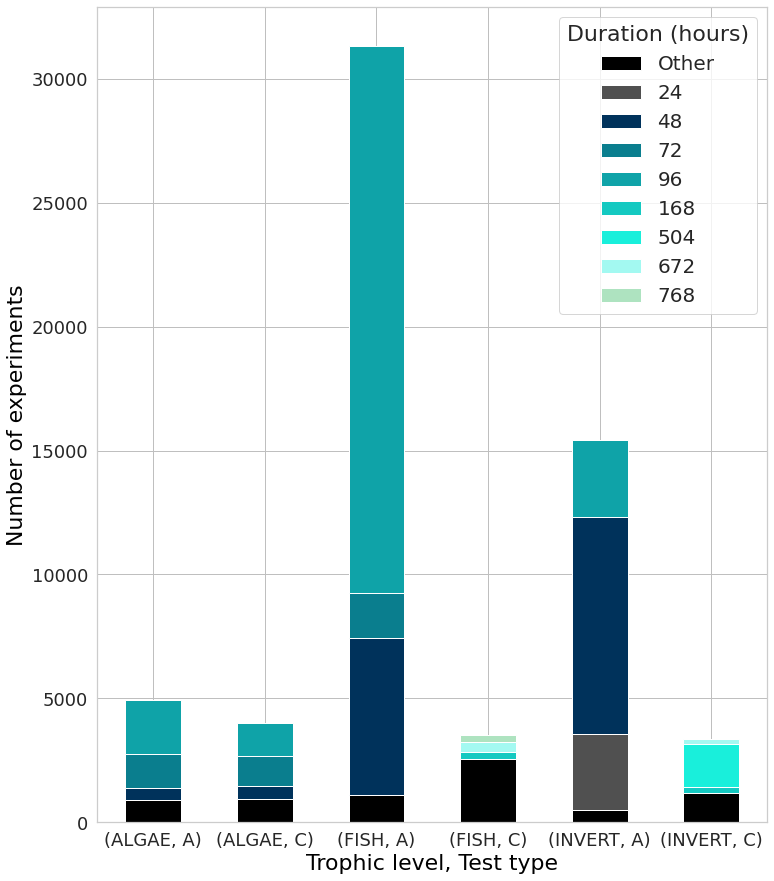

In [26]:
fig, ax = plt.subplots(figsize=(12,15))

plt.grid(color='#BFBFBF', linestyle='solid')

df_grouped_count.unstack().plot(kind='bar', stacked=True, color=colors1, ax=ax)
ax.legend(['Other','24','48','72','96','168','504','672','768'], title='Duration (hours)', fontsize=20, title_fontsize=22)
plt.xlabel('Trophic level, Test type', fontsize=22, color='black')
plt.ylabel('Number of experiments', fontsize=22, color='black')
ax.tick_params(axis='x', labelrotation=0, labelsize=18)
ax.tick_params(axis='y', labelrotation=0, labelsize=18)
plt.savefig('plot1.png', dpi=300)
plt.show()

### Plot 2: Common endpoints

Plot showing common endpoints used for the experiments per trophic level.

'Other' comprises endpoints with an occurence of less than 1000 data points in the database.



In [27]:
df_pie = df_combined[[ 'Test statistic', 'Trophic Level']]
df_pie['Test stat count']= 1
df_pie = df_pie.groupby(['Test statistic', 'Trophic Level'])['Test stat count'].sum().reset_index()
group_sum_temp = df_pie.groupby('Test statistic')['Test stat count'].sum()

In [28]:
df_pie=df_pie.merge(group_sum_temp, how='left',on='Test statistic', suffixes=('_seperate', '_combined'))

In [29]:
#combine all endpoints with an occurence less than 1000
df_pie['Test statistic'] = np.where(df_pie['Test stat count_combined']<1000, 'Other',df_pie['Test statistic'] )

In [30]:
df_pie = df_pie.groupby(['Test statistic', 'Trophic Level'])['Test stat count_seperate'].sum().reset_index()

In [31]:
group_sum = df_pie.groupby('Test statistic')['Test stat count_seperate'].sum()

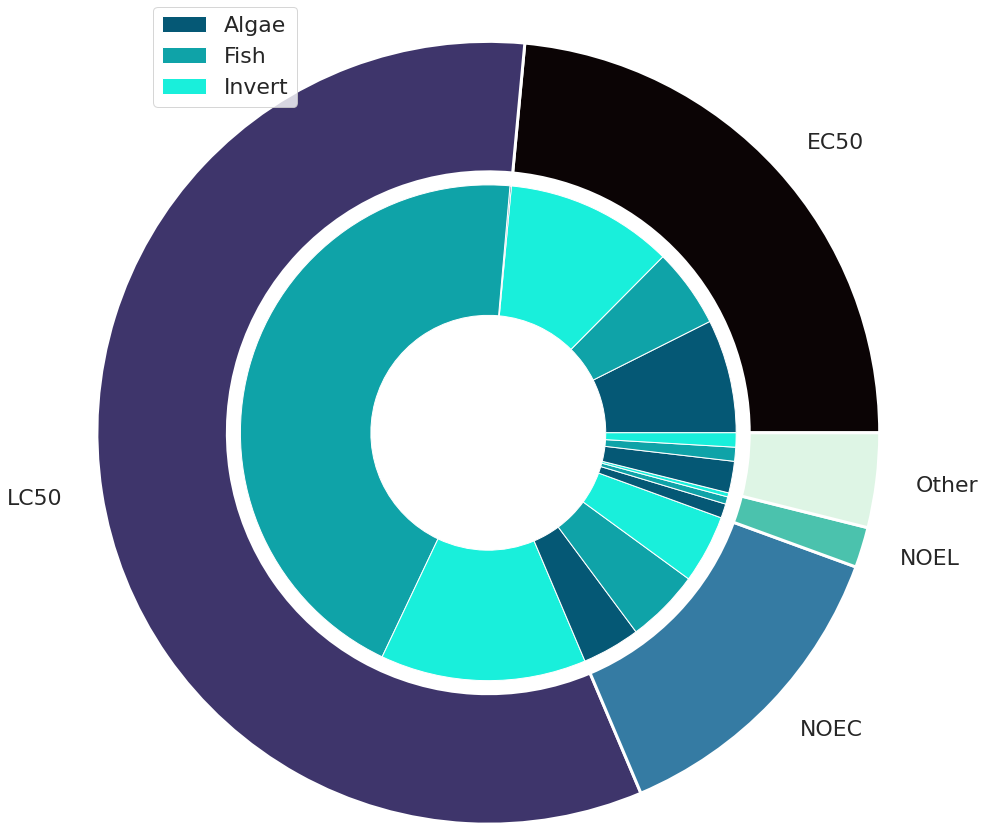

In [32]:
group_names=group_sum.index.values
group_size=group_sum.values
subgroup_names=df_pie['Trophic Level']
subgroup_size=df_pie['Test stat count_seperate']

# Outside ring
fig, ax = plt.subplots(figsize=(12,12))
ax.axis('equal')
pie1, _ = ax.pie(group_size, radius=1.5, labels=group_names,colors= colors2, wedgeprops = {'linewidth': 3} ,textprops={'fontsize': 22})
plt.setp(pie1, width=0.5, edgecolor='white')

# Inside ring
pie2, _ = ax.pie(subgroup_size, radius=1.5-0.55, colors=colors3,  wedgeprops = {'linewidth': 1})
plt.setp(pie2, width=0.5, edgecolor='white')
plt.margins(0.5,0.5)

plt.legend(pie2, ['Algae','Fish','Invert'], loc=(0.0, 1.0), prop={'size': 22})

plt.savefig('plot2.png', dpi=300, bbox_inches="tight")
plt.show()

### Plot 3: Compound classes

Toxicity values for the 5 most common ECOSAR classes, separated by trophic level. 

No handles with labels found to put in legend.


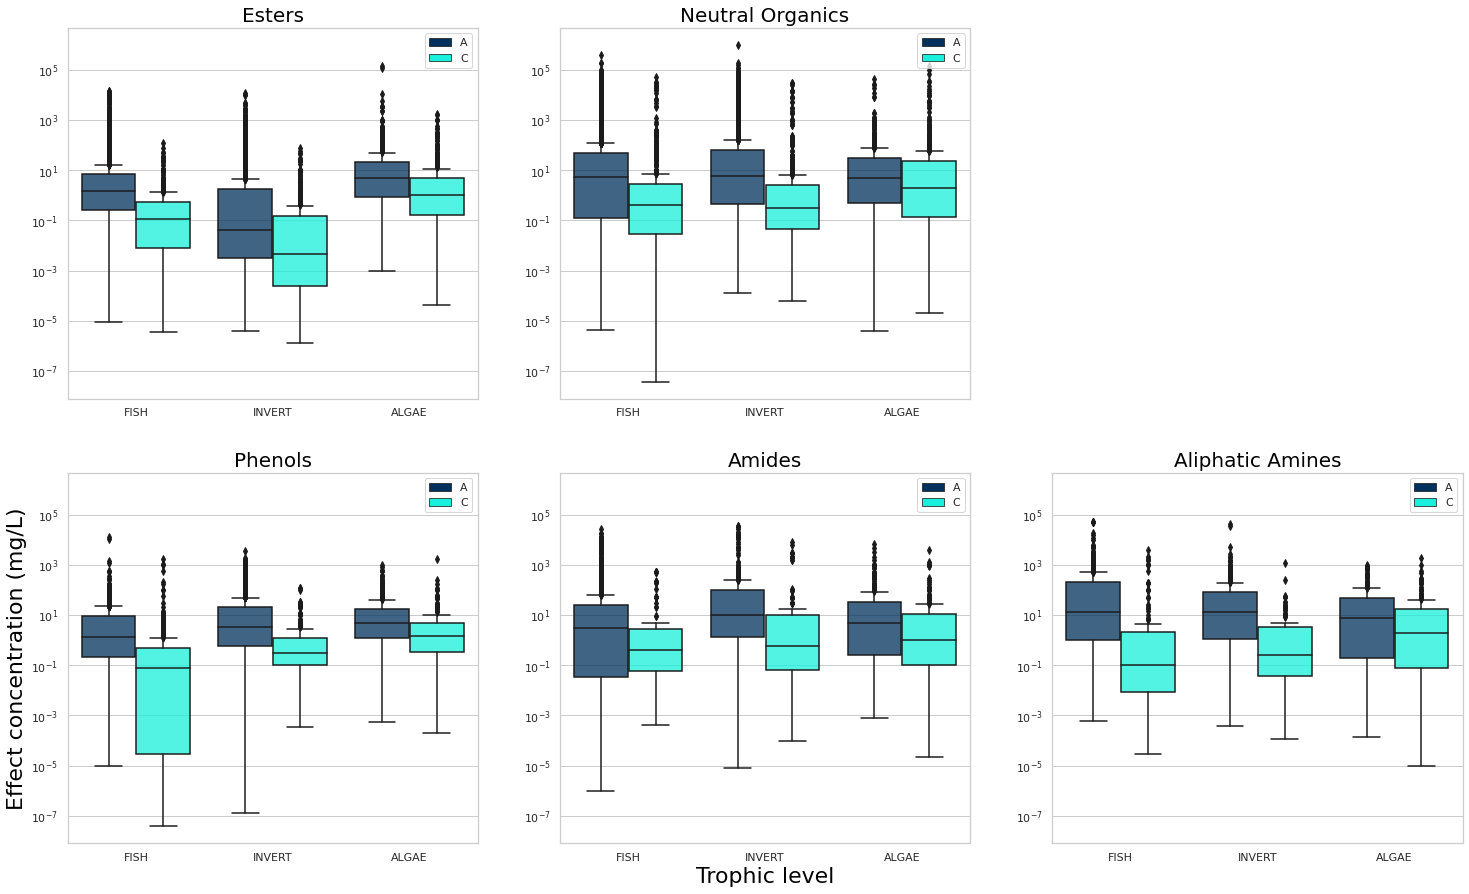

In [33]:
fig, axes = plt.subplots(2, 3, sharey=True)
sns.set(rc={'figure.figsize':(25,15), 'font.size':48, 'font.weight':'normal'})

sns.set_style('whitegrid')
sns.boxplot(x=df_combined['Trophic Level'], y=df_combined[df_combined['ECOSAR classification – collapsed']=='Esters']['Effect value'], orient='v', ax=axes[0][0],palette=colors4, hue=df_combined['Test type'], saturation=1).set_title('Esters', fontsize=20, color='black')
sns.boxplot(x=df_combined['Trophic Level'], y=df_combined[df_combined['ECOSAR classification – collapsed']=='Neutral Organics']['Effect value'], orient='v', ax=axes[0][1],palette=colors4, hue=df_combined['Test type'], saturation=1).set_title('Neutral Organics', fontsize=20, color='black')
sns.boxplot(x=df_combined['Trophic Level'], y=df_combined[df_combined['ECOSAR classification – collapsed']=='Phenols']['Effect value'], orient='v', ax=axes[1][0],palette=colors4, hue=df_combined['Test type'], saturation=1).set_title('Phenols', fontsize=20, color='black')
sns.boxplot(x=df_combined['Trophic Level'], y=df_combined[df_combined['ECOSAR classification – collapsed']=='Amides']['Effect value'], orient='v', ax=axes[1][1],palette=colors4, hue=df_combined['Test type'], saturation=1).set_title('Amides', fontsize=20, color='black')
sns.boxplot(x=df_combined['Trophic Level'], y=df_combined[df_combined['ECOSAR classification – collapsed']=='Aliphatic Amines']['Effect value'], orient='v', ax=axes[1][2],palette=colors4, hue=df_combined['Test type'], saturation=1).set_title('Aliphatic Amines', fontsize=20, color='black')
# tick and legend styles, log scale and transparency setting
for j in axes:
  for i in j:
    i.set(yscale="log")
    i.set_xlabel('', fontsize=22, color='black')
    i.set_ylabel('', fontsize=22, color='black')
    i.yaxis.set_tick_params(which='both', labelleft=True)
    i.legend(loc='upper right')
    for patch in i.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .75))
axes[0][2].set_visible(False)
plt.setp(axes[1][1], xlabel='Trophic level')
plt.setp(axes[1][0], ylabel='Effect concentration (mg/L)')

plt.savefig('plot3.png', dpi=300)
plt.show()


### Plot 4: Data variability

Boxplot for single species (fish: Oncorhynchus mykiss), single endpoint (LC50) and single duration period (96h) for the 5 most common compounds for that testing scenario.

In [34]:
# determine most common duration period for experiments with parameters: fish, LC50, A
most_common_duration=df_combined[(df_combined['Trophic Level']=='FISH') & (df_combined['Test statistic']=='LC50') & (df_combined['Test type']=='A')]['Duration (hours)'].value_counts().index[0]
most_common_duration

96.0

In [35]:
most_common_species=df_combined[(df_combined['Trophic Level']=='FISH') & (df_combined['Test statistic']=='LC50') & (df_combined['Test type']=='A')& (df_combined['Duration (hours)']==most_common_duration)]['Latin name'].value_counts().index[0]
most_common_species #most common species for specific testing scenario

'Oncorhynchus mykiss'

In [36]:
df_specific=df_combined[(df_combined['Trophic Level']=='FISH') & (df_combined['Test statistic']=='LC50') & (df_combined['Test type']=='A')& (df_combined['Duration (hours)']==96.0)& (df_combined['Latin name']=='Oncorhynchus mykiss')]

In [37]:
df_compounds_specific=df_specific['CAS'].value_counts().index[np.r_[0,2:6]] # exclude index 1: TFM (piscicide)

In [38]:
# most common compounds
df_specific1=df_specific[df_specific.CAS==df_compounds_specific[0]] #Trichlorfon
df_specific2=df_specific[df_specific.CAS==df_compounds_specific[1]] # Carbaryl
df_specific3=df_specific[df_specific.CAS==df_compounds_specific[2]] # Endosulfan
df_specific4=df_specific[df_specific.CAS==df_compounds_specific[3]] #Glyphosate-isopropylammonium
df_specific5=df_specific[df_specific.CAS==df_compounds_specific[4]] # Aminocarb
df_specifics= pd.concat([df_specific1, df_specific2, df_specific3, df_specific4, df_specific5], ignore_index=True)

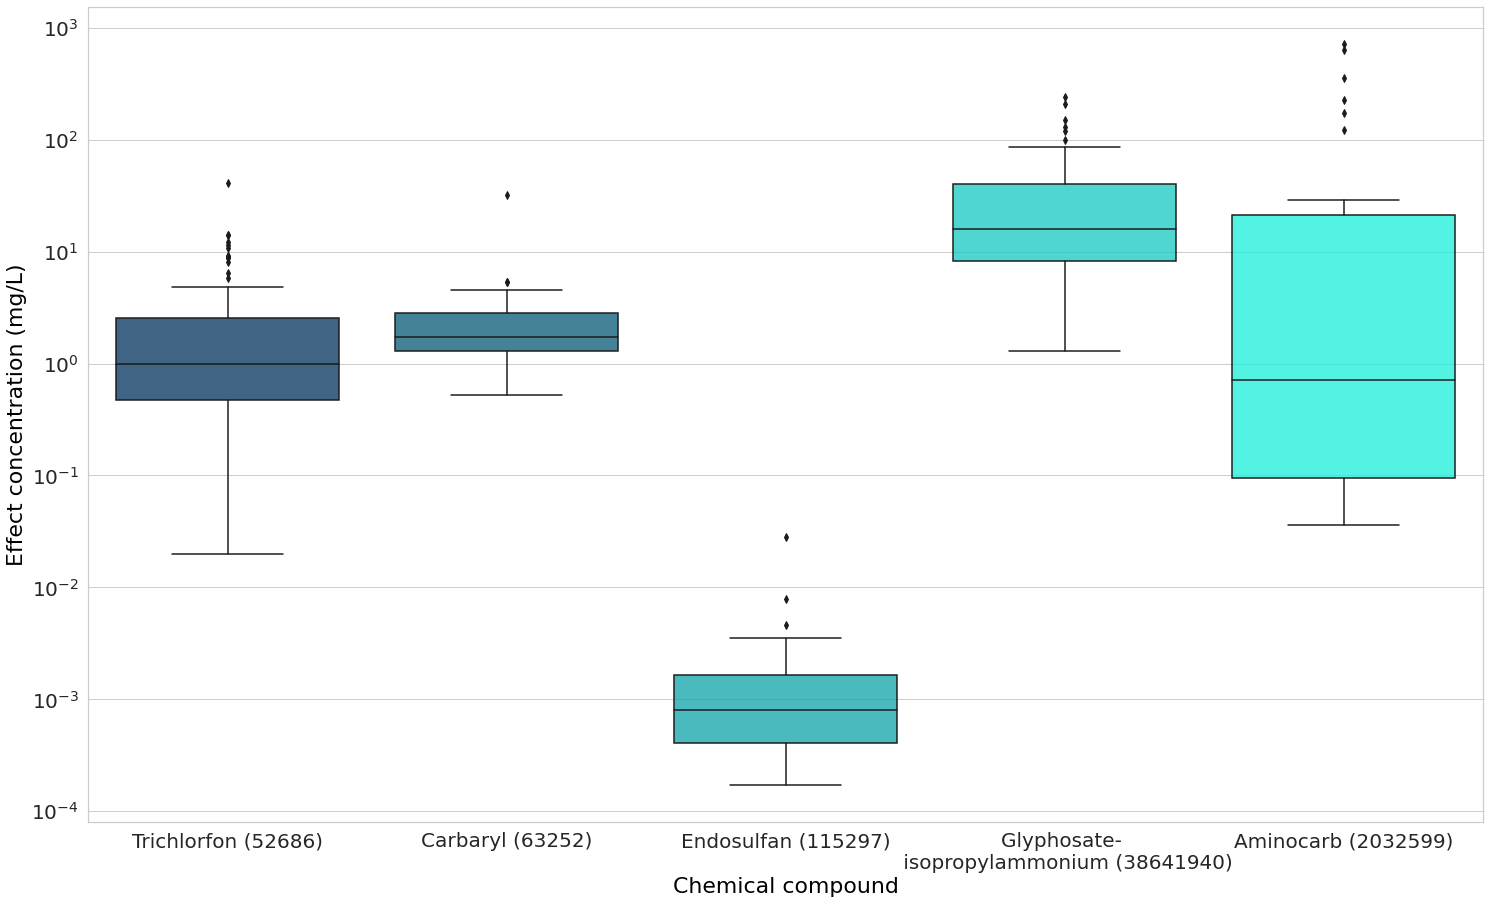

In [39]:
fig, ax = plt.subplots()
sns.boxplot(x="CAS", y='Effect value', data=df_specifics, palette=colors5, ax=ax, saturation=1)  

# x labels
labels = [item.get_text() for item in ax.get_xticklabels()]
list_names=['Trichlorfon','Carbaryl','Endosulfan','Glyphosate- \n isopropylammonium','Aminocarb']
c=0
for i in labels:
  list_names[c]+=' ('+i+')'
  c+=1

# transparency
for patch in ax.artists:
      r, g, b, a = patch.get_facecolor()
      patch.set_facecolor((r, g, b, .75))

# log scale
ax.set(yscale="log")

#style
ax.set_xlabel('Chemical compound',color='black', fontsize=22 )
ax.set_ylabel('Effect concentration (mg/L)',color='black', fontsize=22)
ax.tick_params(axis='x', labelrotation=0, labelsize=20)
ax.tick_params(axis='y', labelrotation=0, labelsize=20)
ax.set_xticklabels(list_names) 

plt.savefig('plot4.png', dpi=300)
plt.show()